In [3]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [4]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df 


In [5]:
pools = pd.read_csv(PARQA + 'data/DPR_property/pools.csv', index_col=0)

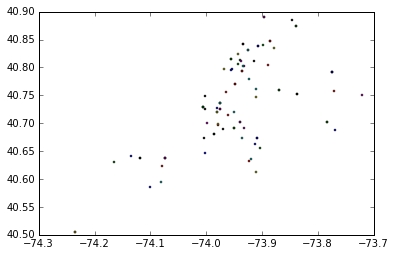

In [6]:
pools = toGeoDataFrame(pools)
pools.plot()

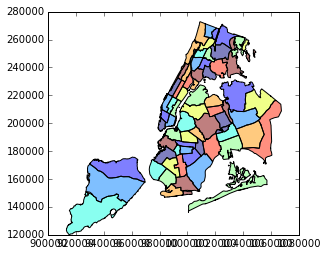

In [7]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

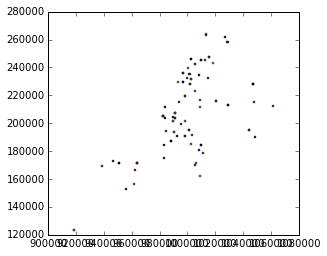

In [8]:
myCrs = pDistricts.crs
pools = pools.to_crs(myCrs)
pools.plot()

In [9]:
poolsD = sjoin(pools, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)
poolsD.head(2)

,Accessible,Location,Name,Phone,Pools_Type,Prop_ID,Setting,Size,lat,lon,rec_center_id,geometry,index_right,parkDistrict
0,Y,170th Street and Clay Avenue,Claremont Pool,(718) 901-4792,Intermediate,X008,Outdoor,75' x 60' x 3.5',40.8390,-73.9073,NaN,POINT (-73.90730000000001 40.83899999999984),11,X-04
1,Y,173rd Street and Fulton Avenue,Crotona Pool,(718) 731-6872,Olympic,X010,Outdoor,330' x 120' x 4',40.8399,-73.8981,NaN,POINT (-73.8981 40.83989999999984),10,X-03


In [10]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [11]:
writeGeoJson(poolsD, PARQA +'data/DPR_property/csv_ll_pD/pools_pd_ll.geojson')